# DSC320: Nonlinear Regression

**Name**: Joseph Choi <br>
**Class**: DSC320-T301 Math for Data Science (2243-1)

In [56]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Assignment 1: US Population Growth

#### (a) Import the data and create two new columns. Create one column that is the number of years since 1790. Create another column that is the population in millions.

In [11]:
# Loading csv file 
    # Creating copy to perform data transformation procedures on

us_pop_df = pd.read_csv('us_pop_data.csv')
us_pop_copy = us_pop_df.copy()

In [12]:
# Calculating the number of years since 1790
    # Subtracting values in 'year' column with 1790
    
us_pop_copy['years_since_1790'] = us_pop_copy['year'] - 1790

In [16]:
# Converting population to millions
    # Dividing values in 'us_pop' with 1M
    
us_pop_copy['pop_in_mil'] = (us_pop_copy['us_pop'] / 1_000_000).round(2)

In [17]:
# Printing result
us_pop_copy.head(3)

,year,us_pop,years_since_1790,pop_in_mil
0,1790,3929326,0,3.93
1,1800,5308483,10,5.31
2,1810,7239881,20,7.24


#### (b) Plot the US population (in millions) versus the years since 1790.

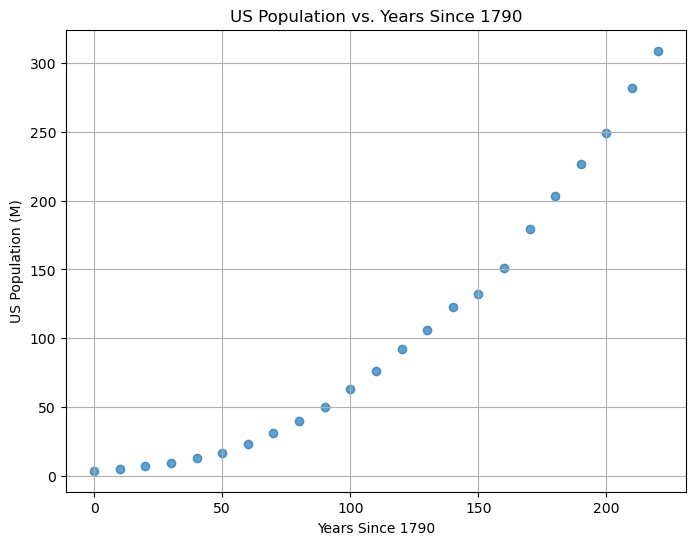

In [39]:
# Creating a scatter plot to understand population growth over time
    # x-axis: Column 'years_since_1790'
    # y-axis: Column 'pop_in_mil'

plt.figure(figsize=(8, 6))
plt.scatter(us_pop_copy['years_since_1790'], us_pop_copy['pop_in_mil'], alpha=0.7)
plt.title('US Population vs. Years Since 1790')
plt.xlabel('Years Since 1790')
plt.ylabel('US Population (M)')
plt.grid(True)

# Printing Results
plt.show()

#### (c) Create a linear regression model to predict the US population (in millions) t years from 1790. Find and report the R2-value of this model.

In [28]:
# Setting up below:
    # X(input variable): Variable that will used to predict target is 'years_since_1790'
    # y(target variable): Variable that will be predicted is 'pop_in_mil'

X = us_pop_copy[['years_since_1790']]
y = us_pop_copy['pop_in_mil']

In [29]:
# Fitting the linear regression model using 'X', 'y' via 'LinearRegression()' & 'fit()'
us_pop_lrm = LinearRegression()
us_pop_lrm.fit(X, y)

LinearRegression()

In [30]:
# Instructing to make predictions via 'predict()'
us_pop_pred = us_pop_lrm.predict(X)

In [31]:
# Calculating R^2-value via 'r2_score'
r2_value = r2_score(y, us_pop_pred)

In [32]:
# Printing result
r2_value

0.9192404609032024

#### (d) Create another new column in your data by squaring the number of years since 1790.

In [36]:
# Squaring the number of years since 1790
us_pop_copy['years_since_1790_squared'] = us_pop_copy['years_since_1790'] **2

In [38]:
# Printing results
us_pop_copy.head(3)

,year,us_pop,years_since_1790,pop_in_mil,years_since_1790_squared
0,1790,3929326,0,3.93,0
1,1800,5308483,10,5.31,100
2,1810,7239881,20,7.24,400


#### (e) Run another linear regression, where your input feature is the square of the number of years since 1790. Find and report the R2-value of this model.

In [41]:
# Setting up below:
    # X_squared(input variable): Variable that will used to predict target is 'years_since_1790_squared'
    # y(target variable): Variable that will be predicted is 'pop_in_mil'

X_squared = us_pop_copy[['years_since_1790_squared']]
y = us_pop_copy['pop_in_mil']

In [42]:
# Fitting the linear regression model using 'X_squared', 'y' via 'LinearRegression()' & 'fit()'
us_pop_lrm_squared = LinearRegression()
us_pop_lrm_squared.fit(X_squared, y)

LinearRegression()

In [43]:
# Instructing to make predictions via 'predict()'
us_pop_pred_squared = us_pop_lrm_squared.predict(X_squared)

In [44]:
# Calculating R^2-value via 'r2_score'
r2_value_squared = r2_score(y, us_pop_pred_squared)

In [45]:
# Printing result
r2_value_squared

0.9984910143326312

#### (f) Plot the models you built on top of the data. Which one fits the data better? Is this apparent in your R2-values. Explain.

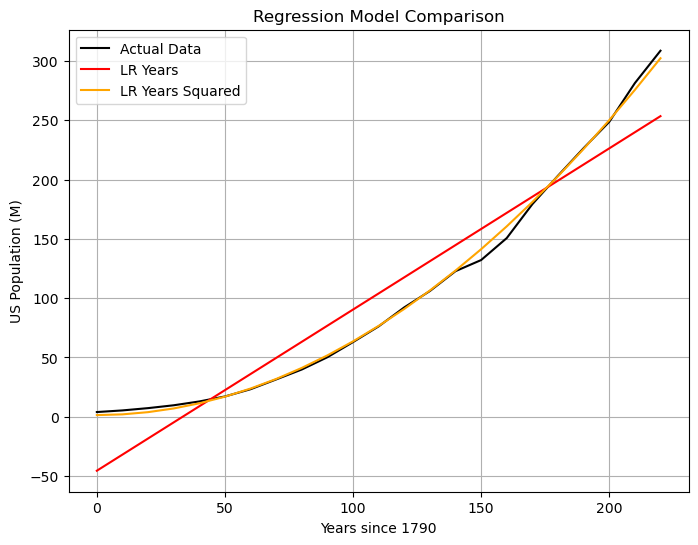

In [52]:
"""
Code Description:
    - Creating a plot that compares results from Actual Data, 1st model ('us_pop_pred'), and 2nd model ('us_pop_pred_squared')
    - Code Breakdown:
        - 1st Part: Plotting the original plot from CSV file
        - 2nd Part: Plotting prediction from first regression model ('years_since_1790')
        - 3rd Part: Plotting prediction from second regression model ('years_since_1790_squared')
        - 4th Part: Formatting plot that layers all three plots in one
"""


# 1st Part:
plt.figure(figsize=(8, 6))
plt.plot(us_pop_copy['years_since_1790'], us_pop_copy['pop_in_mil'], label='Actual Data', color='black')

# 2nd Part:
plt.plot(us_pop_copy['years_since_1790'], us_pop_pred, label='LR Years', color='red')

# 3rd Part:
plt.plot(us_pop_copy['years_since_1790'], us_pop_pred_squared, label='LR Years Squared', color='orange')

# 4th Part:
plt.title('Regression Model Comparison')
plt.xlabel('Years since 1790')
plt.ylabel('US Population (M)')
plt.legend()
plt.grid(True)

# Printing Result
plt.show()

#### Explanation:
According to my regression model comparison plot, the 2nd model using 'years_since_1790_squared' fits the data better. This is apparent in the R2 values as the 2nd model's value came closer to 1 than the 1st model's R2 value.
- **1st R2**: 0.9192404609032024
- **2nd R2**: 0.9984910143326312

As population growth's rate of change is typically not constant, the linear model (1st model) may not accurately depict population growth as it only assumes constant change over time. Therefore, a more nonlinear/flexible model like the 2nd squared model is more appropriate for this case. 

## Assignment 2: Customer Spending Data

#### (a) Make a histogram of the customer spending amounts.

In [53]:
# Loading csv file 
    # Creating copy to perform procedures on

customer_data_df = pd.read_csv('customer_spending.csv')
customer_data_copy = customer_data_df.copy()

# Printing results
customer_data_copy.head(3)

,ann_spending
0,34112
1,33266
2,36610


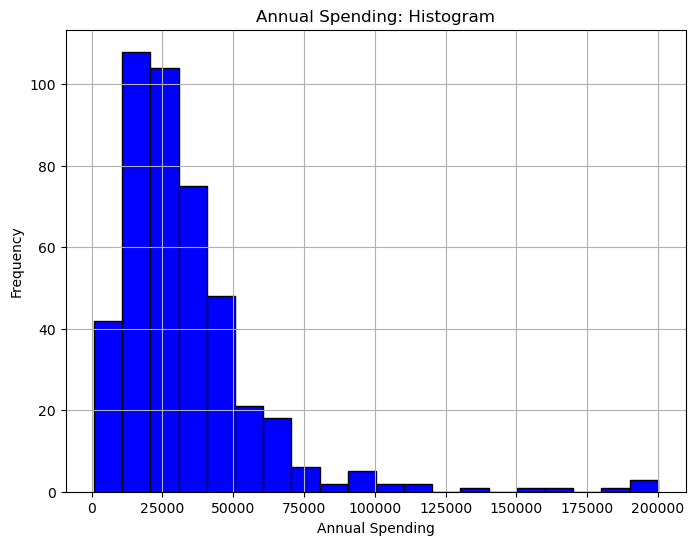

In [59]:
# Creating a histogram to understand distribution of 'ann_spending'
    # x-axis: Column 'ann_spending'
    # y-axis: Frequncy
    # Bins: 20 (specifing number of intervals)

plt.figure(figsize=(8, 6))
plt.hist(customer_data_copy['ann_spending'], bins=20, color='blue', edgecolor='black')
plt.title('Annual Spending: Histogram')
plt.xlabel('Annual Spending')
plt.ylabel('Frequency')
plt.grid(True)

# Printing results
plt.show()

#### (b) Make a new data set that is a log transformation of the customer spending amounts.

In [57]:
# Adding log transformation to values of 'ann_spending' via 'log()'
customer_data_copy['log_ann_spending'] = np.log(customer_data_copy['ann_spending'])

In [58]:
# Printing results
customer_data_copy.head()

,ann_spending,log_ann_spending
0,34112,10.437405
1,33266,10.412291
2,36610,10.508077
3,27381,10.217605
4,46100,10.738568


#### (c) Make a histogram of the log transformed dataset.

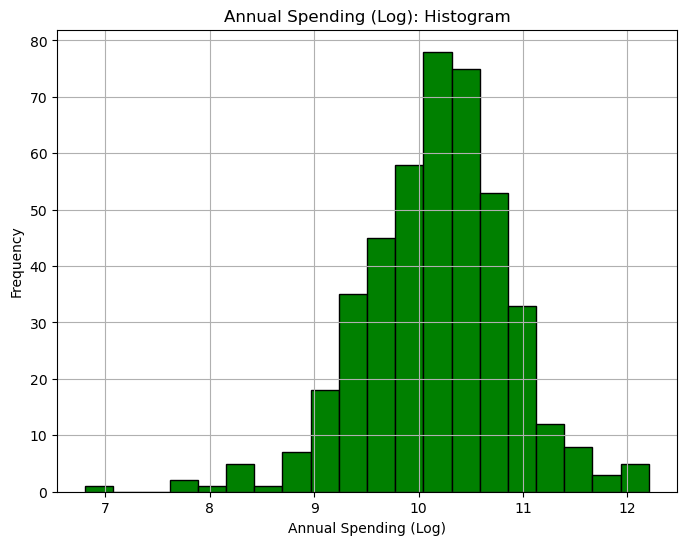

In [60]:
# Creating a histogram to understand distribution of 'log_ann_spending'
    # x-axis: Column 'log_ann_spending'
    # y-axis: Frequncy
    # Bins: 20 (specifing number of intervals)

plt.figure(figsize=(8, 6))
plt.hist(customer_data_copy['log_ann_spending'], bins=20, color='green', edgecolor='black')
plt.title('Annual Spending (Log): Histogram')
plt.xlabel('Annual Spending (Log)')
plt.ylabel('Frequency')
plt.grid(True)

# Printing results
plt.show()

#### (d) Compare the two histograms. Discuss why it might be useful to apply a log transformation to this data for modeling purposes.

#### Explanation:
The 1st histogram shows taller bars on the left and lower bars in the middle to the right. This description suggests that it is a right-skewed distribution. It signals that majority of the customer spends smaller amounts as opposed to spending larger amounts. The 2nd histogram has a more of a symmetric look based on the bars. The log transformation on 'ann_spending' normalized the values which is a big factor to why the histogram looks closer to a normal distribution.

A popular reason to use log transformation to data for modeling purposes is to reduce the impact of extreme values. This allows the model to be less sensitive to outliers and in return would improve model performance. 